### 분리된 데이터를 합치기

1. Data Load

In [96]:
# file Load
import pandas as pd
import numpy as np

# 1. Gold data
Gold_files = ['./raw_data/금 선물 과거 데이터.csv', './raw_data/금 선물 과거 데이터 (1).csv', './raw_data/금 선물 과거 데이터 (2).csv']

# 2. SnP data
SnP_files = ['./raw_data/S&P 500 과거 데이터 (1).csv', './raw_data/S&P 500 과거 데이터 (2).csv', './raw_data/S&P 500 과거 데이터 (3).csv']

# 3. Dollar data
Dollar_files = ['./raw_data/달러 지수 과거 데이터.csv', './raw_data/달러 지수 과거 데이터 (2).csv', './raw_data/달러 지수 과거 데이터 (3).csv']

In [97]:
# Check Data
Gold = pd.read_csv(Gold_files[0])
Gold.head()
# 종가와 날짜만 사용

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2024- 04- 19,"2,413.80","2,394.00","2,433.30","2,386.80",NaN,0.66%
1,2024- 04- 18,"2,398.00","2,377.90","2,408.00","2,377.20",200.55K,0.40%
2,2024- 04- 17,"2,388.40","2,398.00","2,412.00","2,370.70",284.35K,-0.81%
3,2024- 04- 16,"2,407.80","2,399.10","2,414.80","2,379.20",297.59K,1.04%
4,2024- 04- 15,"2,383.00","2,369.40","2,404.30","2,340.20",343.73K,0.37%


In [98]:
Gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      4899 non-null   object
 1   종가      4899 non-null   object
 2   시가      4899 non-null   object
 3   고가      4899 non-null   object
 4   저가      4899 non-null   object
 5   거래량     4874 non-null   object
 6   변동 %    4899 non-null   object
dtypes: object(7)
memory usage: 268.0+ KB


In [99]:
# def : 종가만 추출
def extract_close_price(files):
    total = pd.DataFrame()
    for file in files:
        data = pd.read_csv(file)
        # 날짜를 datatime으로 변환, 인덱스로 설정
        data['날짜'] = pd.to_datetime(data['날짜'])
        data.set_index('날짜', inplace=True)
        # 종가만 추출, float로 변환
        data['종가'] = data['종가'].astype(str)
        data['종가'] = data['종가'].str.replace(',', '').astype(float)
        data = data[['종가']]
        total = pd.concat([total, data])
    return total

Gold = extract_close_price(Gold_files)
Gold.head(), Gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11265 entries, 2024-04-19 to 1979-12-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      11265 non-null  float64
dtypes: float64(1)
memory usage: 176.0 KB


(                종가
 날짜                
 2024-04-19  2413.8
 2024-04-18  2398.0
 2024-04-17  2388.4
 2024-04-16  2407.8
 2024-04-15  2383.0,
 None)

In [100]:
# Compile the data
Gold = extract_close_price(Gold_files)
SnP = extract_close_price(SnP_files)
Dollar = extract_close_price(Dollar_files)

# Save the data
Gold.to_csv('../DATA/Gold_791226_240419.csv')
SnP.to_csv('../DATA/SnP_791226_240419.csv')
Dollar.to_csv('../DATA/Dollar_791226_240419.csv')

# Check the data
Gold = pd.read_csv('../DATA/Gold_791226_240419.csv')
SnP = pd.read_csv('../DATA/SnP_791226_240419.csv')
Dollar = pd.read_csv('../DATA/Dollar_791226_240419.csv')

print(Gold.head())
print(SnP.head())
print(Dollar.head())


           날짜      종가
0  2024-04-19  2413.8
1  2024-04-18  2398.0
2  2024-04-17  2388.4
3  2024-04-16  2407.8
4  2024-04-15  2383.0
           날짜       종가
0  2024-04-19  4967.23
1  2024-04-18  5011.12
2  2024-04-17  5022.21
3  2024-04-16  5051.41
4  2024-04-15  5061.82
           날짜      종가
0  2024-04-19  106.12
1  2024-04-18  106.18
2  2024-04-17  105.96
3  2024-04-16  106.34
4  2024-04-15  106.20


In [101]:
print(len(Gold), len(SnP), len(Dollar))

11265 11176 11454


2. Visualization

In [102]:
import matplotlib.pyplot as plt

# x축을 날짜로 설정, datatime으로 변환
Gold['날짜'] = pd.to_datetime(Gold['날짜'])
Gold.set_index('날짜', inplace=True)

SnP['날짜'] = pd.to_datetime(SnP['날짜'])
SnP.set_index('날짜', inplace=True)

Dollar['날짜'] = pd.to_datetime(Dollar['날짜'])
Dollar.set_index('날짜', inplace=True)


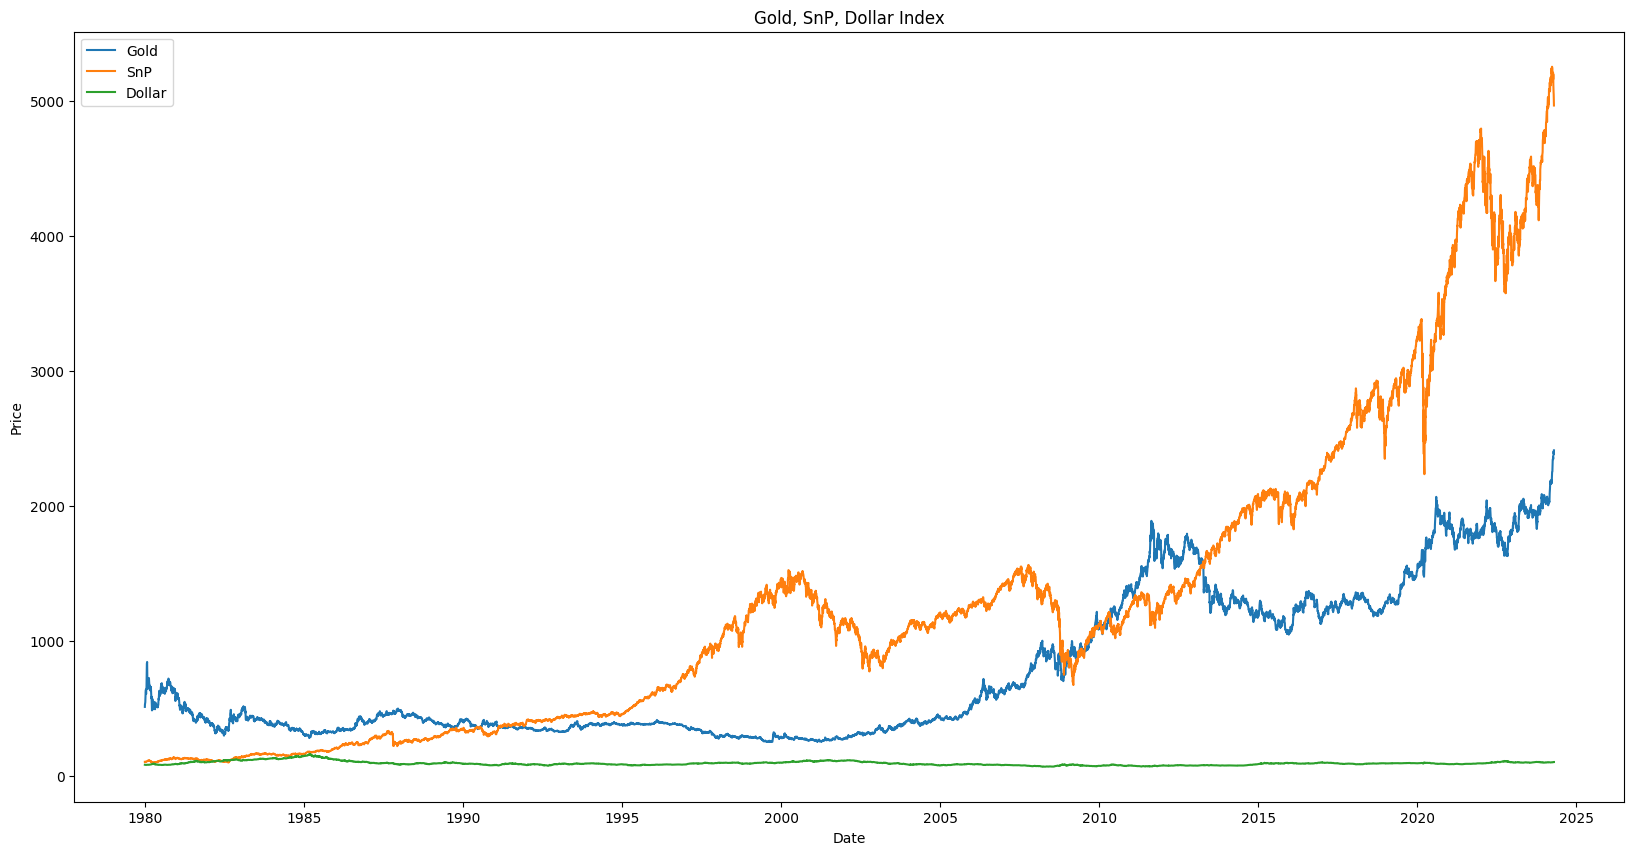

In [103]:

# 그래프 그리기
plt.figure(figsize=(20, 10))
plt.plot(Gold, label='Gold')
plt.plot(SnP, label='SnP')
plt.plot(Dollar, label='Dollar')
plt.title('Gold, SnP, Dollar Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Gold가 왜 안보이지?

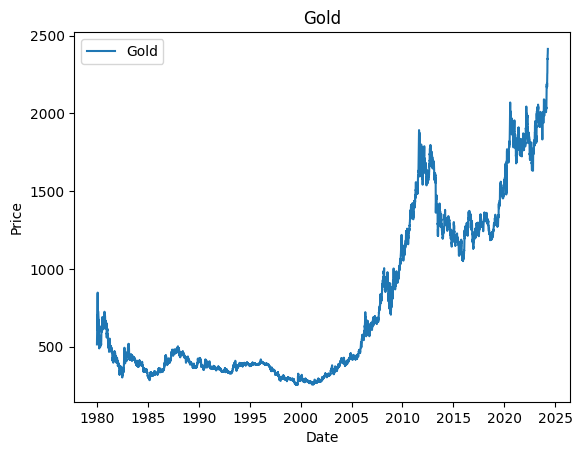

In [104]:
plt.plot(Gold, label='Gold')
plt.title('Gold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 있는데??

In [105]:
# 일단 한 파일로 합치기
data = pd.concat([Gold, SnP, Dollar], axis=1)
data.columns = ['Gold', 'SnP', 'Dollar']
data

,Gold,SnP,Dollar
날짜,,,
1979-12-26,514.3,107.80,85.99
1979-12-27,532.0,108.00,85.51
1979-12-28,533.0,107.80,85.81
1979-12-31,549.4,107.90,85.82
1980-01-01,NaN,107.90,NaN
...,...,...,...
2024-04-15,2383.0,5061.82,106.20
2024-04-16,2407.8,5051.41,106.34
2024-04-17,2388.4,5022.21,105.96


In [106]:
# 결측치 확인
data.isnull().sum()

Gold      231
SnP       320
Dollar     42
dtype: int64

In [107]:
# 결측치 채우기
# - 방법 : 평균, 중앙값, 직전값, 직후값, 보간법
# - 보간법 : 선형, 다항식, 시계열
# - 시계열 보간법 : 시계열 데이터의 특성을 고려하여 결측치를 채워넣는 방법
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11496 entries, 1979-12-26 to 2024-04-19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    11265 non-null  float64
 1   SnP     11176 non-null  float64
 2   Dollar  11454 non-null  float64
dtypes: float64(3)
memory usage: 359.2 KB


(None,
                Gold           SnP        Dollar
 count  11265.000000  11176.000000  11454.000000
 mean     785.402197   1293.001422     96.280986
 std      545.322566   1158.538139     14.927690
 min      253.700000     98.200000     71.330000
 25%      364.700000    360.425000     86.020000
 50%      442.900000   1103.000000     94.150000
 75%     1251.900000   1553.400000    101.640000
 max     2413.800000   5254.400000    164.720000)

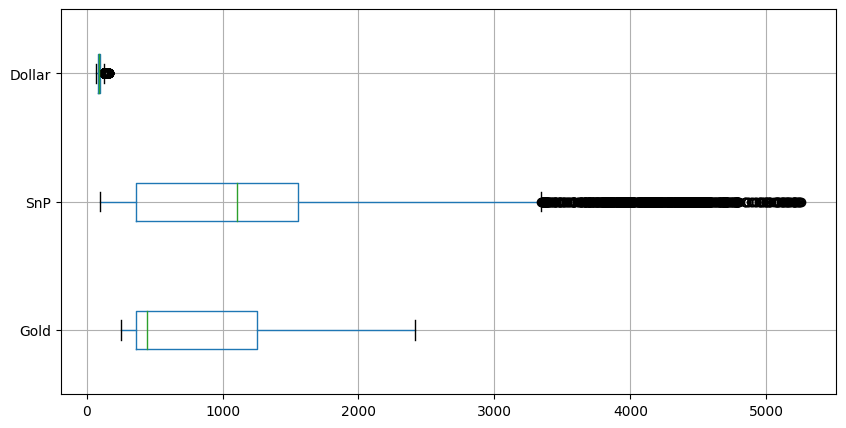

In [108]:
# boxplot
data.boxplot(vert=False, figsize=(10, 5))
plt.show()

In [109]:
data_fill = data.interpolate(method='time')
data.isnull().sum()

Gold      231
SnP       320
Dollar     42
dtype: int64

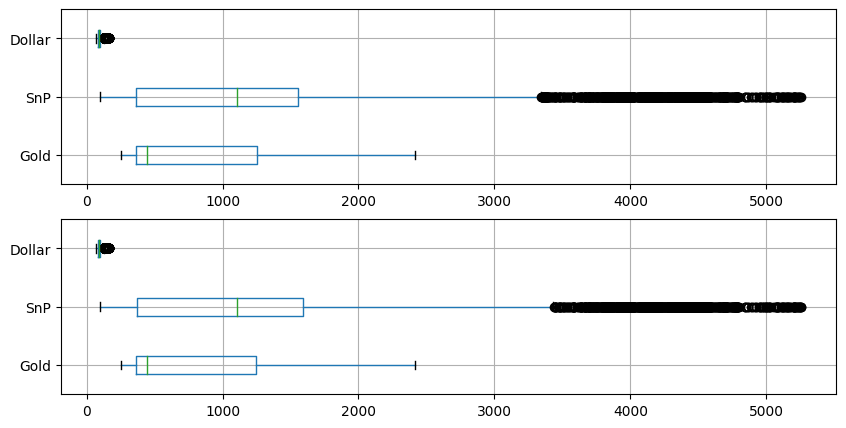

In [112]:
# boxplot compare
ax, fig = plt.subplots(2, 1, figsize=(10, 5))
data.boxplot(vert=False, ax=fig[0])
data_fill.boxplot(vert=False, ax=fig[1])
plt.show()

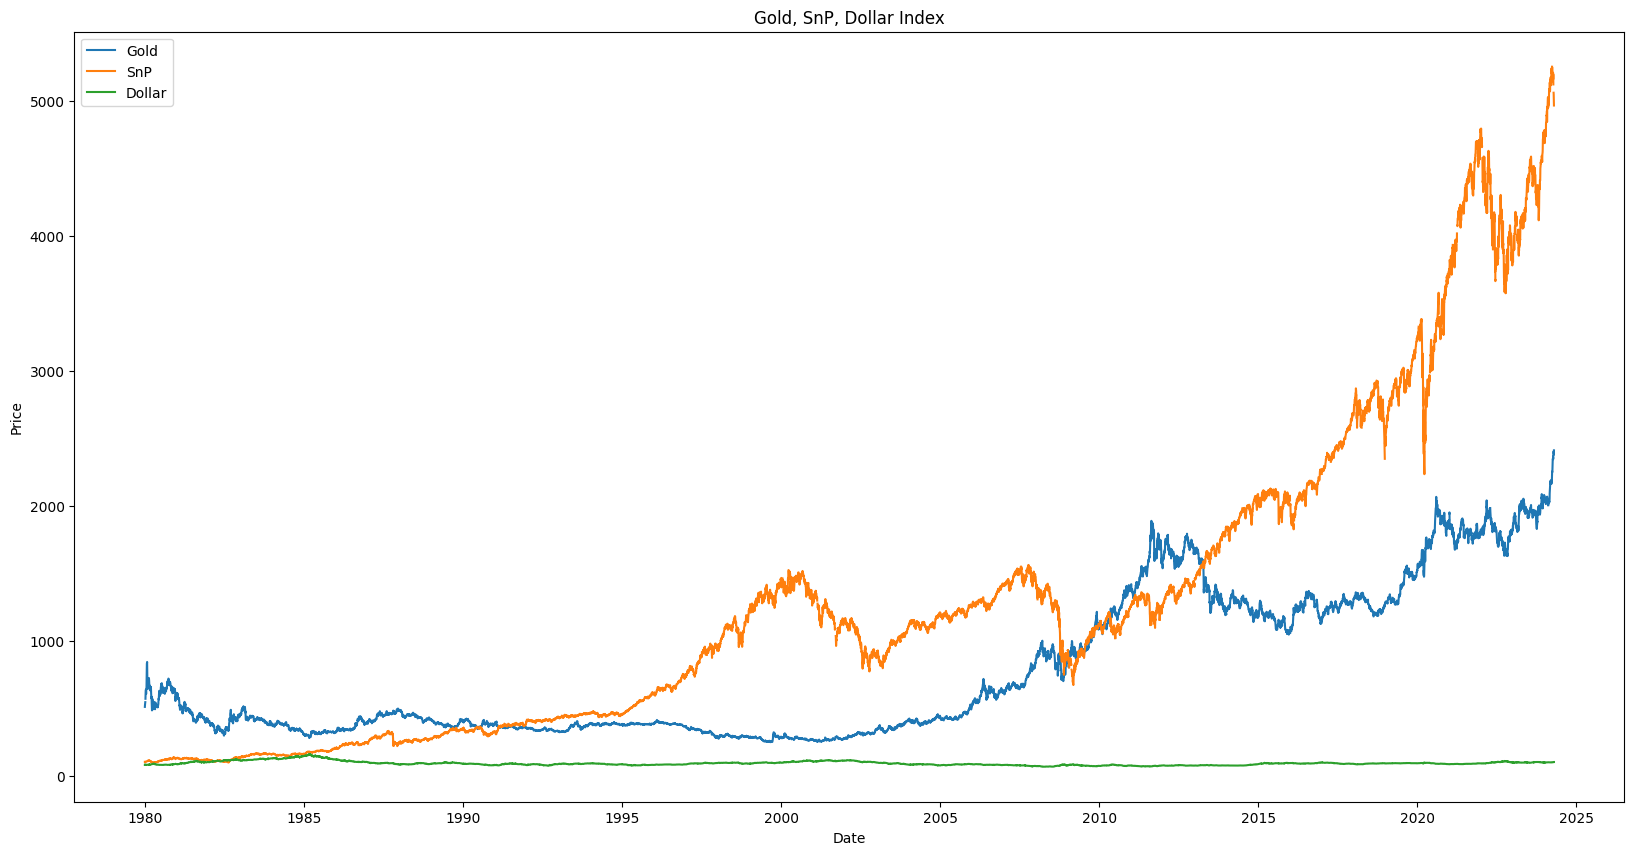

In [113]:
# Check graph
plt.figure(figsize=(20, 10))
plt.plot(data['Gold'], label='Gold')
plt.plot(data['SnP'], label='SnP')
plt.plot(data['Dollar'], label='Dollar')
plt.title('Gold, SnP, Dollar Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### ㅎㅎㅎㅎㅎㅎㅎ 지금보니까 dollar에 gold를 넣음 ㅎㅎㅎㅎㅎㅎㅎ 휴

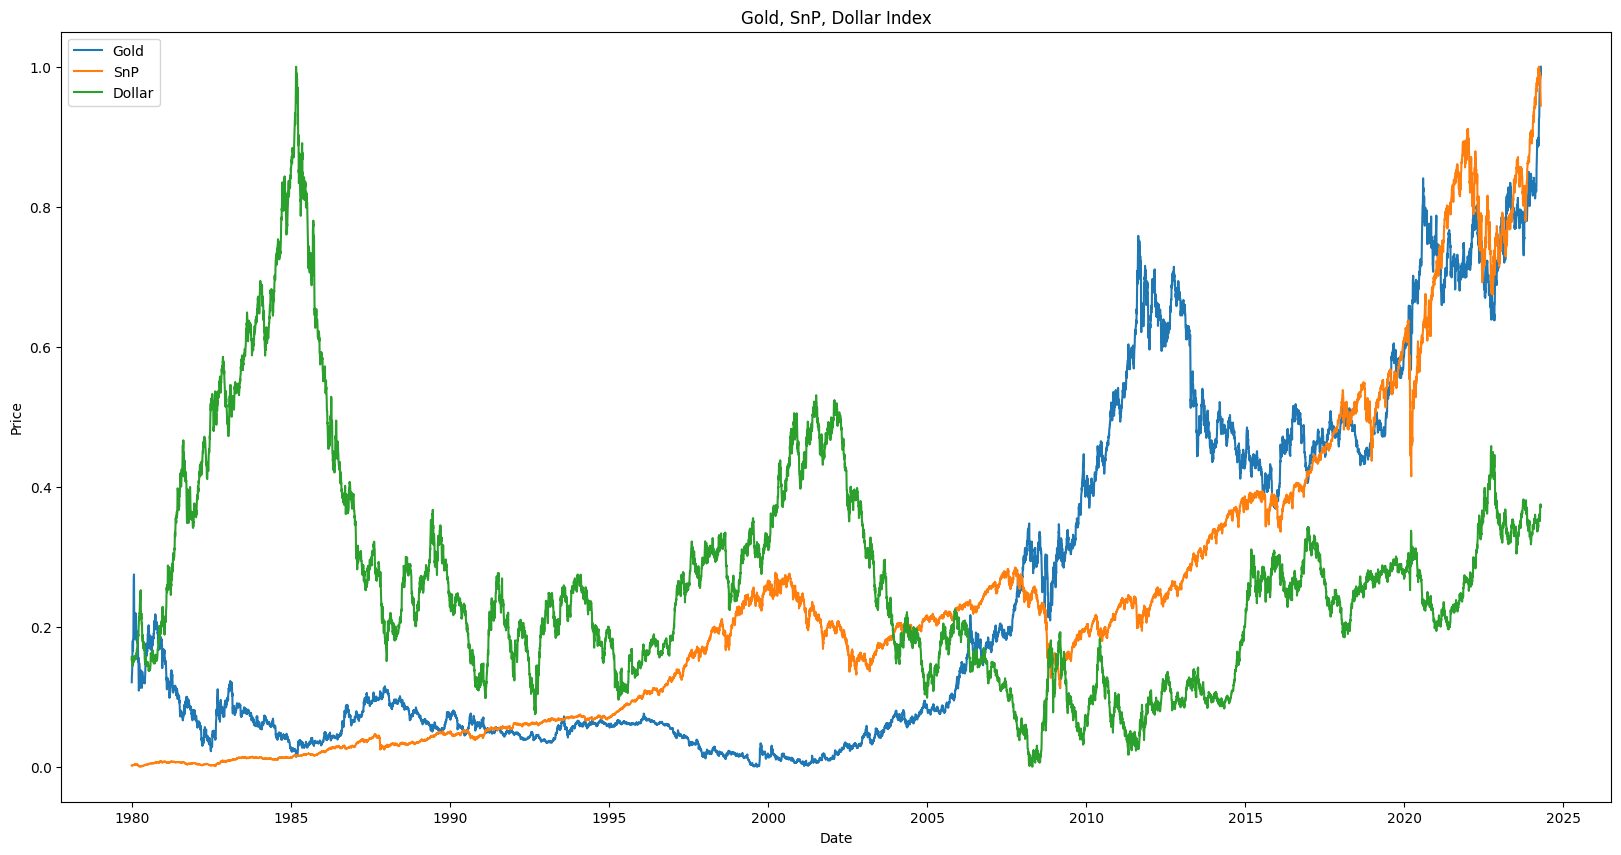

In [114]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_fill)
data_scaled = pd.DataFrame(data_scaled, columns=data_fill.columns, index=data_fill.index)
data_scaled

# Check graph
plt.figure(figsize=(20, 10))
plt.plot(data_scaled['Gold'], label='Gold')
plt.plot(data_scaled['SnP'], label='SnP')
plt.plot(data_scaled['Dollar'], label='Dollar')
plt.title('Gold, SnP, Dollar Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

c:\Users\wjs31\.conda\envs\Torch_NLP38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wjs31\.conda\envs\Torch_NLP38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


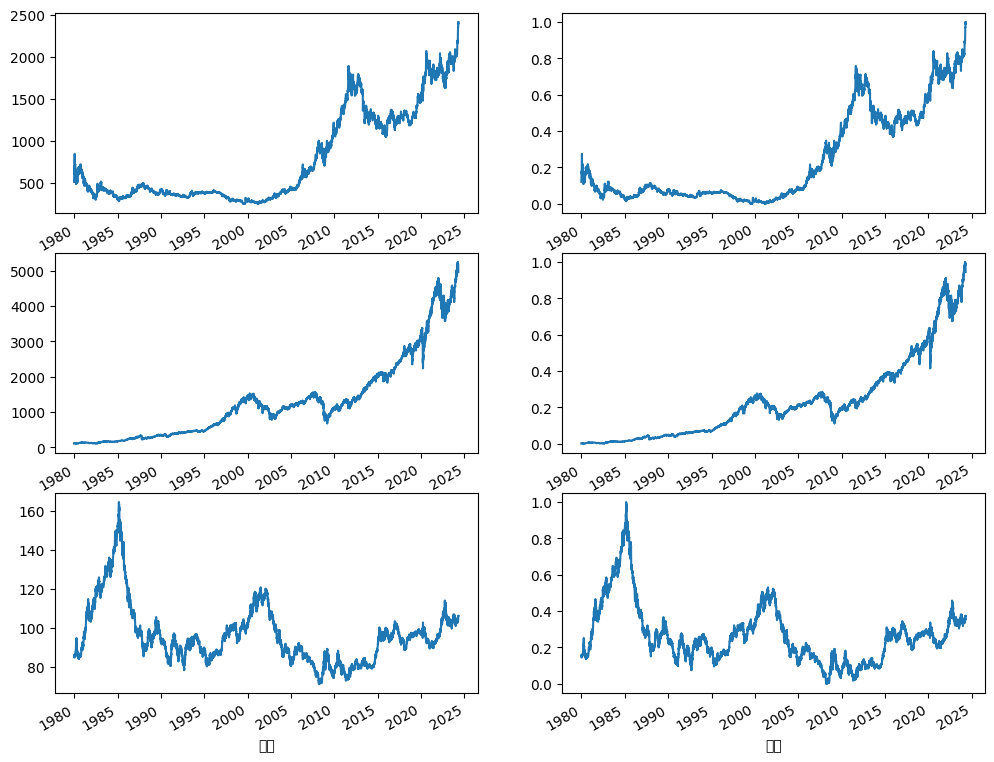

In [118]:
# 각 지표를 data_fill 과 data_scaled 를 비교
ax, fig = plt.subplots(3, 2, figsize=(12, 10))
data_fill['Gold'].plot(ax=fig[0, 0])
data_scaled['Gold'].plot(ax=fig[0, 1])
data_fill['SnP'].plot(ax=fig[1, 0])
data_scaled['SnP'].plot(ax=fig[1, 1])
data_fill['Dollar'].plot(ax=fig[2, 0])
data_scaled['Dollar'].plot(ax=fig[2, 1])
plt.show()



In [119]:
# Save the data
data_fill.to_csv('../DATA/data_fill_791226_240419.csv')
data_scaled.to_csv('../DATA/data_scaled_791226_240419.csv')